### Human Activity Recognition (HAR):
- __Definition:__ Identifying specific movements or actions of a person using sensor data.
- __Typical Activities:__ Includes walking, talking, standing, sitting, and more focused activities like cooking or factory work.
- __Sensor Data Sources:__
  - Remote Recording: Video, radar, or other wireless methods.
  - Direct Recording: Sensors on the person, such as accelerometers and gyroscopes in smartphones or custom hardware.
- __Historical Context:__
  1. Challenges:
      - Sensor data collection was once challenging and expensive, requiring custom hardware.
  3. Modern Solutions:
      - Smartphones and Personal Devices: Now ubiquitous and inexpensive, making sensor data collection easier and more common.
      - Fitness and Health Monitoring: Common applications of HAR with readily available data.
- __Problem Statement:__
  - Objective: Predict the activity from a snapshot of sensor data.
  - Data Types: Typically involves univariate or multivariate time series data from one or more sensor types.
- __Challenges:__
  - Data Variability: Different subjects perform activities differently, leading to variations in sensor data.
  - Modeling Difficulty: No direct way to relate sensor data to specific activities.
- __Approach:__
  - Data Collection: Record sensor data and corresponding activities from specific subjects.
  - Model Training: Fit a model using this data.
  - Generalization: Use the trained model to classify activities of new, unseen subjects based on their sensor data.

Two main neural network approaches are effective for time series classification and have shown strong performance in activity recognition using sensor data from smartphones and fitness trackers:
1. Convolutional Neural Network (CNN) Models.
2. Recurrent Neural Network (RNN) Models.
   
__Recommendations:__
- __RNN and LSTM:__
  - Best For: Recognizing short activities with a natural order.
  - Reason: They utilize the time-order relationship between sensor readings.
- __CNN:__
  - Best For: Inferring long-term repetitive activities.
  - Reason: They excel at learning deep features in recursive patterns.

### Data Preparation for Time Series Classification:

__Sliding Window Approach:__
- Definition: Dividing input signal data into windows of signals, where each window may contain one to a few seconds of observation data. This is often called a sliding window.
- Usage: Applied in both classical machine learning methods on hand-crafted features and neural networks.
  
__Window Size Considerations:__ 
No Best Window Size: Depends on the model, nature of the sensor data, and the activities being classified.

__Trade-offs:__
- Larger Windows: Require larger models, slower to train.
- Smaller Windows: Require smaller models, faster to train and fit.
  
__Intuitive Effects:__
- Smaller Windows: Faster activity detection, reduced resource and energy needs.
- Larger Windows: Better for recognizing complex activities.
  
__Overlapping Windows:__
- Purpose: Mitigates the risk of missing transitions between activities by overlapping the end of one window with the start of the next.
- Common Overlap: 50%, where the first half of the new window contains the last half of the previous window.
  
__Risks:__
- Transition Errors: Errors can appear at the beginning or end of activities.
- Incorrect Lengths: Truncated activity instances due to improper window lengths.
  
__Overlap in Neural Networks:__
- Effect:
  - Increases Training Data: A 50% overlap doubles the size of the training data, useful for smaller datasets.
  - Risk of Overfitting: Larger training data can lead to overfitting.
- Usage:
  - Common in Some Applications: Overlapping windows are tolerated and useful in specific contexts.
  - Less Frequent: Not always necessary and less frequently used with neural networks.

### Combined CNN-LSTM Model for HAR:
- __Common Approach:__ Using an LSTM in conjunction with a CNN for Human Activity Recognition (HAR) problems.
- __Model Types:__
  1. CNN-LSTM Model.
  2. ConvLSTM Model.
- __How It Works:__
- CNN:
  - Purpose: Extracts features from subsequences of raw sample data.
  - Function: Processes short-term dependencies and patterns in the data.
- LSTM:
  - Purpose: Interprets the features extracted by the CNN.
  - Function: Aggregates and models long-term dependencies and sequential relationships.

### Human Activity Recognition Dataset
- __Problem:__ Classifying sequences of accelerometer data from specialized harnesses or smartphones into known movements.
- __Challenges:__
  - Large number of observations per second.
  - Temporal nature of observations.
  - Difficulty in relating accelerometer data to specific movements.
- __Standard Dataset:__ Activity Recognition Using Smartphones
  - Published: 2012 by Davide Anguita et al., University of Genova, Italy.
  - Paper: "A Public Domain Dataset for Human Activity Recognition Using Smartphones" (2013).
  - Link: https://www.esann.org/sites/default/files/proceedings/legacy/es2013-84.pdf.
- __Dataset Details:__
  - Participants: 30 volunteers aged 19-48 years.
  - Protocol:
       - Each participant performed activities wearing a waist-mounted Samsung Galaxy S II smartphone.
       - Six activities: standing, sitting, lying down, walking, walking downstairs, walking upstairs.
       - Each activity was performed twice: first with the phone fixed on the left side of the belt, then as preferred by the user.
  - Pre-processing:
       - Noise filtering on accelerometer and gyroscope data.
       - Data split into fixed windows of 2.56 seconds (128 data points) with 50% overlap.
       - Accelerometer data split into gravitational (total) and body motion components.    
- __Dataset Usage:__
  - Link: https://raw.githubusercontent.com/jbrownlee/Datasets/master/HAR_Smartphones.zip
  - Download all the files in your working directory, unzip them, and rename the folder to "HARDataset".
- __Contents:__
  - Directories:
       - train: Training data (70% of the dataset).
       - test: Testing data (30% of the dataset).
  - Files:
       - README.txt: Detailed technical description.
       - features.txt: Description of engineered features.     
- __Train and Test Folders:__ Both folders contain similar files but with different data.
- __Important Files in Train Folder:__
  - Inertial Signals Folder: Contains preprocessed data.
  - X_train.txt: Engineered features for model fitting.
  - y_train.txt: Class labels for each observation (1-6).
  - subject_train.txt: Mapping of each data record to a subject identifier (1-30).
- __Inertial Signals Directory:__
  - Gravitational Acceleration Data: total_acc_x_train.txt, total_acc_y_train.txt, total_acc_z_train.txt.
  - Body Acceleration Data: body_acc_x_train.txt, body_acc_y_train.txt, body_acc_z_train.txt.
  - Body Gyroscope Data: body_gyro_x_train.txt, body_gyro_y_train.txt, body_gyro_z_train.txt.
- __Data Format:__
  - Separation: Columns are separated by whitespace.
  - Scaling: Values appear scaled to the range -1 to 1, confirmed by the README.txt file.

### Load and Explore Human Activity Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

In [2]:
# Load a single file from the HAR dataset as a numpy array
def load_file(filepath):
    """
    Load a file from the HAR dataset.
    
    Parameters:
    filepath (str): The path to the file to load.
    
    Returns:
    numpy.ndarray: The loaded data.
    """
    dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

In [3]:
# Load the total_acc_y_train.txt file and print its shape
data = load_file('HARDataset/train/Inertial Signals/total_acc_y_train.txt')
# The training data is comprised of 7,352 rows or windows of data, where each window has 128 observations
print(data.shape)

(7352, 128)


In [4]:
data[0]

array([-0.1232167, -0.1268756, -0.1240037, -0.1249279, -0.1257667,
       -0.124462 , -0.1273606, -0.1278912, -0.1258682, -0.1243682,
       -0.1231382, -0.1213345, -0.1183578, -0.120062 , -0.1221186,
       -0.12008  , -0.1209017, -0.1213949, -0.1215677, -0.1246812,
       -0.1254896, -0.1249345, -0.1249063, -0.1249926, -0.1251552,
       -0.1247985, -0.1254793, -0.1268068, -0.1272888, -0.123713 ,
       -0.1192631, -0.1226967, -0.1271224, -0.126278 , -0.1261419,
       -0.1251686, -0.121594 , -0.1190558, -0.1179128, -0.1174034,
       -0.1172102, -0.1181487, -0.1185709, -0.1179084, -0.1205067,
       -0.1243031, -0.1256299, -0.1246896, -0.1218014, -0.1202801,
       -0.1206562, -0.1210648, -0.1216185, -0.1241114, -0.1280997,
       -0.1280257, -0.126537 , -0.1274474, -0.1273523, -0.1264597,
       -0.1247455, -0.1236691, -0.1229069, -0.1215528, -0.123976 ,
       -0.1268078, -0.1277862, -0.1266547, -0.1236336, -0.1249187,
       -0.1243005, -0.1197982, -0.1192223, -0.120174 , -0.1213

In [5]:
# Load a list of files and stack them as a 3D numpy array
def load_group(filenames, prefix=''):
    """
    Load multiple files and stack them into a single 3D numpy array.
    
    Parameters:
    filenames (list): List of filenames to load.
    prefix (str): Prefix path to the files.
    
    Returns:
    numpy.ndarray: The stacked data.
    """
    loaded = [load_file(prefix + name) for name in filenames]
    return np.dstack(loaded)

In [6]:
# Load the total accelerometer data (x, y, z) for training
filenames = ['total_acc_x_train.txt', 'total_acc_y_train.txt', 'total_acc_z_train.txt']
total_acc = load_group(filenames, prefix='HARDataset/train/Inertial Signals/')
print(total_acc.shape)
# (samples, timesteps, features)

(7352, 128, 3)


In [7]:
total_acc[0]

array([[ 1.012817  , -0.1232167 ,  0.1029341 ],
       [ 1.022833  , -0.1268756 ,  0.1056872 ],
       [ 1.022028  , -0.1240037 ,  0.1021025 ],
       [ 1.017877  , -0.1249279 ,  0.1065527 ],
       [ 1.02368   , -0.1257667 ,  0.1028135 ],
       [ 1.016974  , -0.124462  ,  0.1074931 ],
       [ 1.017746  , -0.1273606 ,  0.1093857 ],
       [ 1.019263  , -0.1278912 ,  0.1038862 ],
       [ 1.016417  , -0.1258682 ,  0.1024732 ],
       [ 1.020745  , -0.1243682 ,  0.0975659 ],
       [ 1.018643  , -0.1231382 ,  0.09764665],
       [ 1.019521  , -0.1213345 ,  0.09537356],
       [ 1.02026   , -0.1183578 ,  0.09367106],
       [ 1.018041  , -0.120062  ,  0.09921876],
       [ 1.020829  , -0.1221186 ,  0.09997368],
       [ 1.018644  , -0.12008   ,  0.09889572],
       [ 1.019398  , -0.1209017 ,  0.0962825 ],
       [ 1.020399  , -0.1213949 ,  0.09765831],
       [ 1.019222  , -0.1215677 ,  0.1004408 ],
       [ 1.022093  , -0.1246812 ,  0.09846986],
       [ 1.020433  , -0.1254896 ,  0.101

- Given the parallel structure of the train and test folders, we will create a new function to load input and output data for a specified folder.
- This function compiles a list of the 9 data files, combines them into a NumPy array with 9 features, and loads the output class data.
- The load_dataset() function below can be used for either the train or test group by passing the group name as an argument.

In [8]:
# Load a dataset group, such as train or test
def load_dataset(group, prefix=''):
    """
    Load all data for a given dataset group (train or test).
    
    Parameters:
    group (str): The dataset group to load ('train' or 'test').
    prefix (str): Prefix path to the dataset.
    
    Returns:
    tuple: Input data (X) and output class data (y).
    """
    filepath = prefix + group + '/Inertial Signals/'
    # List all 9 data files to load
    filenames = [
        # Total acceleration
        'total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt',
        # Body acceleration
        'body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt',
        # Body gyroscope
        'body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt'
    ]
    # Load input data
    X = load_group(filenames, filepath)
    # Load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y

In [9]:
# Example usage
X_train, y_train = load_dataset('train', prefix='HARDataset/')
X_test, y_test = load_dataset('test', prefix='HARDataset/')
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)


### Balance of Ativity Classes

- Verify that each of the 30 subjects performed all six activities, ensuring balanced data for modeling and accurate dataset interpretation.
- Use the function breakdown() to summarize the distribution of output variables (y) by:
   - Converting the data into a DataFrame.
   - Grouping data by activity class and calculating group sizes (number of rows).
   - Presenting results with counts and percentages to confirm data balance.

In [10]:
# Summarize the balance of classes in an output variable column
def class_breakdown(data):
    # Convert the numpy array into a DataFrame
    df = pd.DataFrame(data)
    
    # Group data by the class value and calculate the number of rows per class
    counts = df.groupby(0).size()
    
    # Iterate through each class and calculate percentage
    total_rows = len(df)
    for class_value, count in counts.items():
        percent = count / total_rows * 100
        print(f'Class={class_value}, total={count}, percentage={percent:.3f}')

In [11]:
# summarize class breakdown
print('Train Dataset:')
class_breakdown(y_train)

print('\nTest Dataset:')
class_breakdown(y_test)

# summarize combined class breakdown
print('\nBoth:')
combined = np.vstack((y_train, y_test))
class_breakdown(combined)

Train Dataset:
Class=1, total=1226, percentage=16.676
Class=2, total=1073, percentage=14.595
Class=3, total=986, percentage=13.411
Class=4, total=1286, percentage=17.492
Class=5, total=1374, percentage=18.689
Class=6, total=1407, percentage=19.138

Test Dataset:
Class=1, total=496, percentage=16.831
Class=2, total=471, percentage=15.982
Class=3, total=420, percentage=14.252
Class=4, total=491, percentage=16.661
Class=5, total=532, percentage=18.052
Class=6, total=537, percentage=18.222

Both:
Class=1, total=1722, percentage=16.720
Class=2, total=1544, percentage=14.992
Class=3, total=1406, percentage=13.652
Class=4, total=1777, percentage=17.254
Class=5, total=1906, percentage=18.507
Class=6, total=1944, percentage=18.876


In [12]:
y_test

array([[5],
       [5],
       [5],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

### Plot Time Series Per Subject

In [13]:
# we can load the subject train.txt in the train directory that provides a mapping of rows to the subject to which it belongs.
# load subject mapping
sub_map = load_file('HARDataset/train/subject_train.txt')
train_subjects = np.unique(sub_map)
print(train_subjects)

[ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]


In [14]:
sub_map

array([[ 1],
       [ 1],
       [ 1],
       ...,
       [30],
       [30],
       [30]], dtype=int64)

__Retrieve Data for a Single Subject:__
- Identify rows belonging to a specific subject (e.g., subject number 1) by using a mapping.
- Use these row numbers to extract samples from the loaded training dataset (X and y).
- The data_for_subject() function implements this:
   - Takes loaded training data (X and y) and a mapping of row numbers to subjects.
   - Accepts the subject identification number (sub_id) to return only the X and y data for that subject.

In [15]:
# Retrieve all data for a specific subject
def data_for_subject(X, y, sub_map, sub_id):
    # Get row indexes for the subject id
    row_indexes = [i for i, sid in enumerate(sub_map) if sid == sub_id]
    
    # Select samples for the specified subject
    selected_X = X[row_indexes, :, :]
    selected_y = y[row_indexes]
    
    return selected_X, selected_y

__Flatten Data for Plotting:__
- Once data for a single subject is obtained, it consists of overlapping windows.
- To plot it as a continuous line plot, a function can be written to flatten these windows into a single sequence.
- The to_series() function below achieves this for a specific variable (e.g., an array of windows):
- to_series() Function:
   - Takes an array of windows as input.
   - Removes overlap and flattens the windows into a long sequence.
   - Outputs a series suitable for direct plotting as a line plot.

In [16]:
# Convert a series of windows to a 1D list
def to_series(windows):
    series = []
    for window in windows:
        # Remove overlap from the window
        half = len(window) // 2
        series.extend(window[-half:])
    return series

__Plot Data for a Single Subject:__
- After preparing the data, plot each of the nine variables sequentially and a final plot for activity level.
- Ensure each series has the same number of time steps (length of x-axis) for easy comparison.
- Create subplots aligned vertically to compare variable movements.
- The plot_subject() function below implements this for the X and y data of a single subject, assuming variables are in the order as loaded in load_dataset().
- plot_subject() Function:
   - Plots each variable and activity level sequentially.
   - Uses subplots to align plots vertically for clear comparison.
   - Includes crude titles on each plot for clarity.

In [17]:
# Plot the data for one subject
def plot_subject(X, y):
    plt.figure(figsize=(10, 12))  # Adjust figure size as needed
    
    # Determine the total number of plots
    num_plots = X.shape[2] + 1
    offset = 0
    
    # Plot total acceleration
    for i in range(3):
        plt.subplot(num_plots, 1, offset + 1)
        plt.plot(to_series(X[:, :, offset]))
        plt.title('total acc ' + str(i), y=0, loc='left', size=10)  # Adjust title size
        plt.yticks([])  # Remove y-axis ticks
        plt.xticks([])  # Remove x-axis ticks
        offset += 1
    
    # Plot body acceleration
    for i in range(3):
        plt.subplot(num_plots, 1, offset + 1)
        plt.plot(to_series(X[:, :, offset]))
        plt.title('body acc ' + str(i), y=0, loc='left', size=10)  # Adjust title size
        plt.yticks([])  # Remove y-axis ticks
        plt.xticks([])  # Remove x-axis ticks
        offset += 1
    
    # Plot body gyro
    for i in range(3):
        plt.subplot(num_plots, 1, offset + 1)
        plt.plot(to_series(X[:, :, offset]))
        plt.title('body gyro ' + str(i), y=0, loc='left', size=10)  # Adjust title size
        plt.yticks([])  # Remove y-axis ticks
        plt.xticks([])  # Remove x-axis ticks
        offset += 1
    
    # Plot activities
    plt.subplot(num_plots, 1, num_plots)
    plt.plot(y)
    plt.title('activity', y=0, loc='left', size=10)  # Adjust title size
    
    plt.tight_layout()  # Adjust subplot layout
    plt.show()

In [18]:
# get the data for one subject
sub_id = train_subjects[0]
sub_X, sub_y = data_for_subject(X_train, y_train, sub_map, sub_id)
print(sub_X.shape, sub_y.shape)

(347, 128, 9) (347, 1)


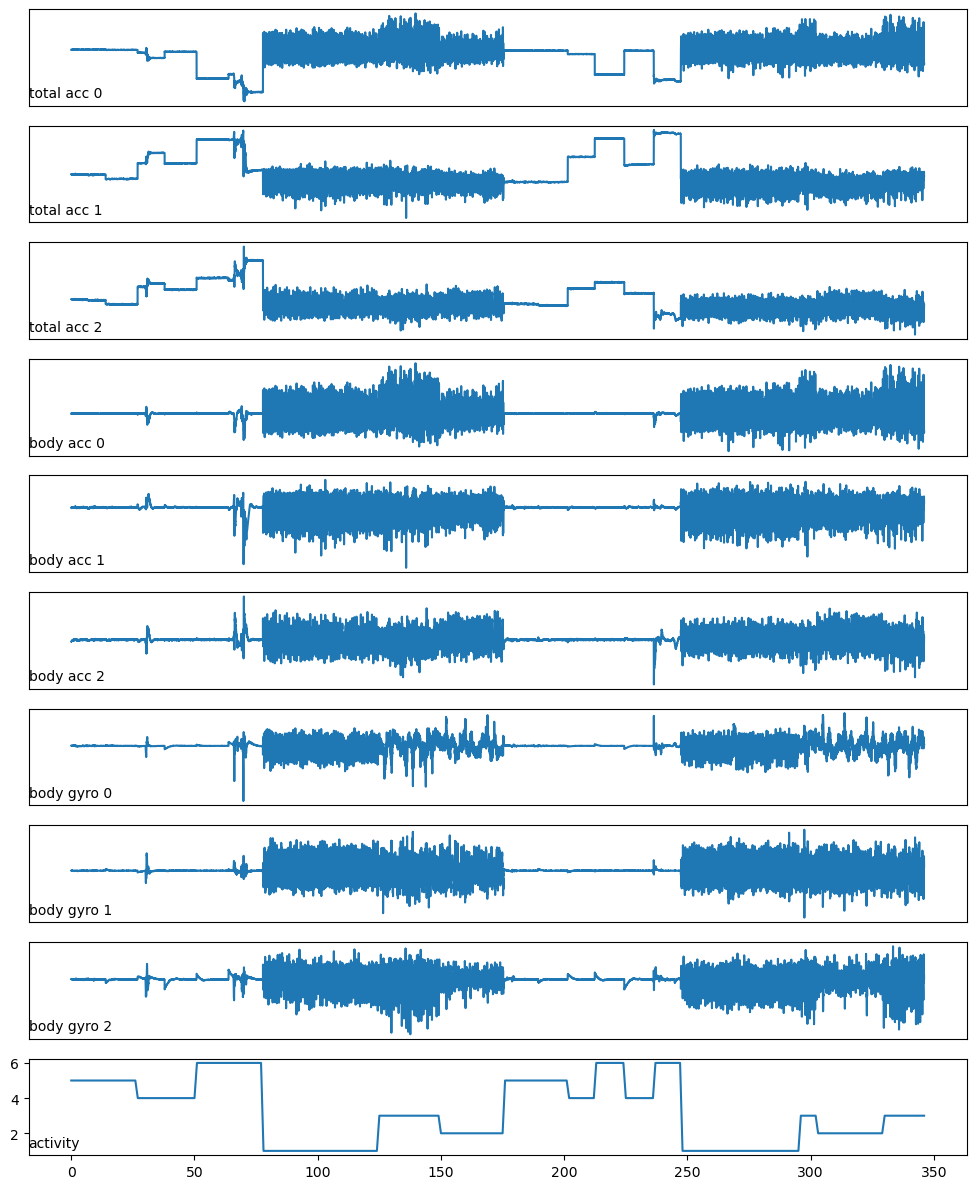

In [19]:
# plot data for subject
plot_subject(sub_X, sub_y)

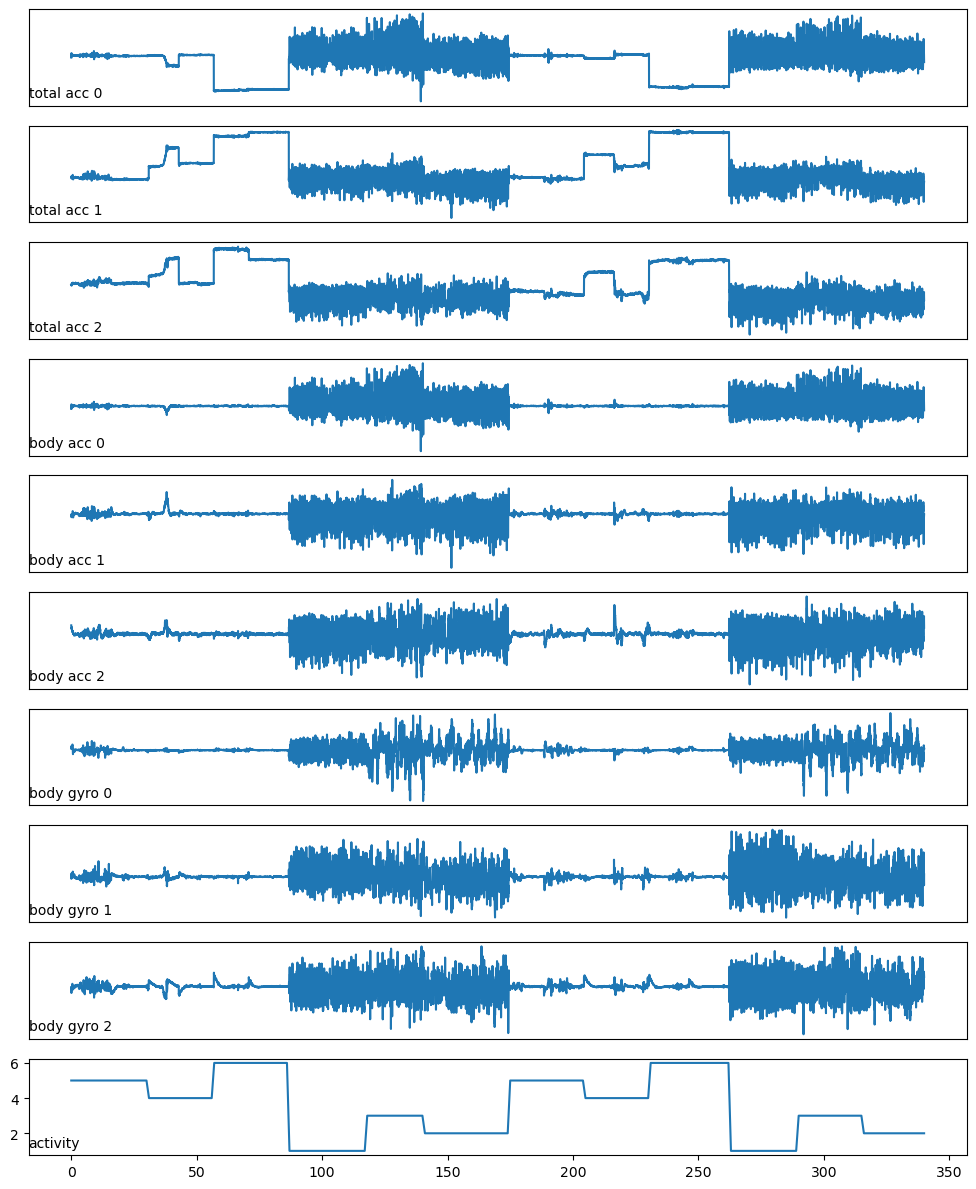

In [20]:
# get the data for one subject
sub_id = train_subjects[1]
sub_X, sub_y = data_for_subject(X_train, y_train, sub_map, sub_id)
# plot data for subject
plot_subject(sub_X, sub_y)

### Analyzing Movement Data Consistency Across Subjects
- We aim to predict activities using movement data from some subjects, implying consistency in movement patterns across subjects.
- Data is scaled between -1 and 1 per subject, suggesting similar movement amplitudes.
- Given identical activities, we anticipate similar distributions of movement data across subjects.
- To verify this, we will plot histograms of movement data for each subject, showing all three axes (e.g., total acceleration), and repeat this for multiple subjects.

In [21]:
# Plot histograms for multiple subjects
def plot_subject_histograms(X, y, sub_map, offset, title, n=10):
    plt.figure(figsize=(8, 10))  # Adjust figure size as needed
    plt.suptitle(title, fontsize=14)  # Title for the entire figure
    
    # Get unique subjects
    subject_ids = np.unique(sub_map[:, 0])
    
    # Iterate over subjects
    for k in range(min(n, len(subject_ids))):  # Limit to `n` subjects or available subjects
        sub_id = subject_ids[k]
        
        # Get data for the current subject
        subX, _ = data_for_subject(X, y, sub_map, sub_id)
        
        # Plot histograms for each axis (total acc)
        for i in range(3):
            ax = plt.subplot(n, 1, k + 1)  # Create subplot for each subject
            ax.set_xlim(-1, 1)  # Set x-axis limit from -1 to 1
            ax.hist(to_series(subX[:, :, offset + i]), bins=100)  # Plot histogram
            plt.yticks([])  # Remove y-axis ticks
            plt.xticks([-1, 0, 1])  # Set x-axis ticks at -1, 0, and 1
    
    plt.tight_layout()  # Adjust subplot layout
    plt.show()

- __Three figures each containing 10 plots with histograms for x, y, and z axes.__
- __Colors: x (blue), y (orange), z (green)__.

__1. Total Acceleration:__
- Distributions appear Gaussian with distinct clusters around 0.0.
- Some distributions align, suggesting continuity in movement data across subjects.

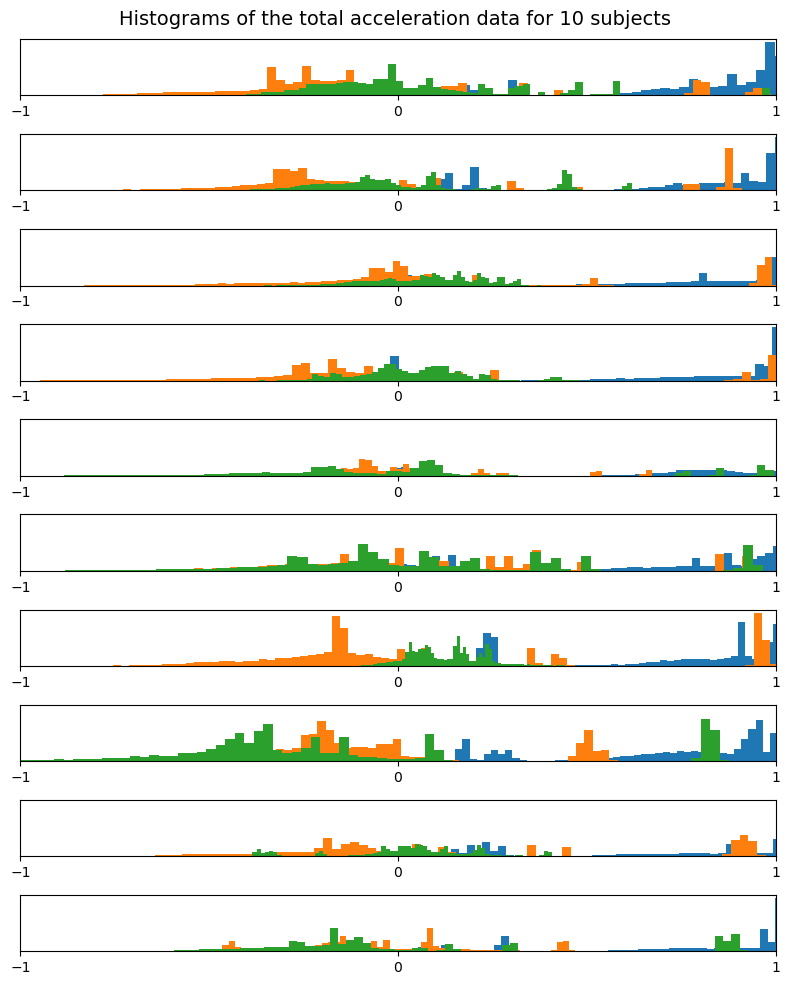

In [22]:
# plot total acceleration histograms for subjects
plot_subject_histograms(X_train, y_train, sub_map, 0, "Histograms of the total acceleration data for 10 subjects")

__2. Body Acceleration:__
- Histograms show data clustered tightly around 0.0 across axes and subjects.
- Suggests data was centered (zero mean), aiding modeling with consistent patterns.
- This strong consistency across subjects may aid in modeling, and may suggest that the differences across subjects in the total acceleration data may not be as helpful.

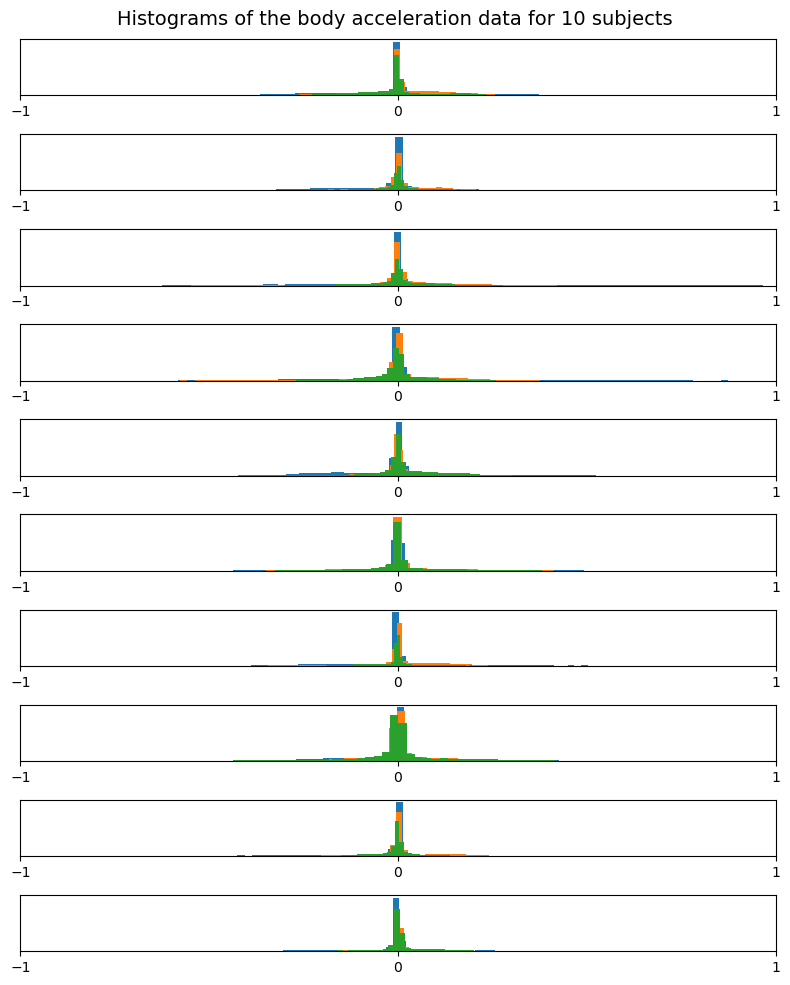

In [23]:
# plot total acceleration histograms for subjects
plot_subject_histograms(X_train, y_train, sub_map, 3, "Histograms of the body acceleration data for 10 subjects")

__3. Gyroscopic Data:__
- Histograms indicate Gaussian-like distributions for each axis.
- Distributions centered around 0.0 with wider spreads and fatter tails.
- Promising for modeling movement data across subjects.

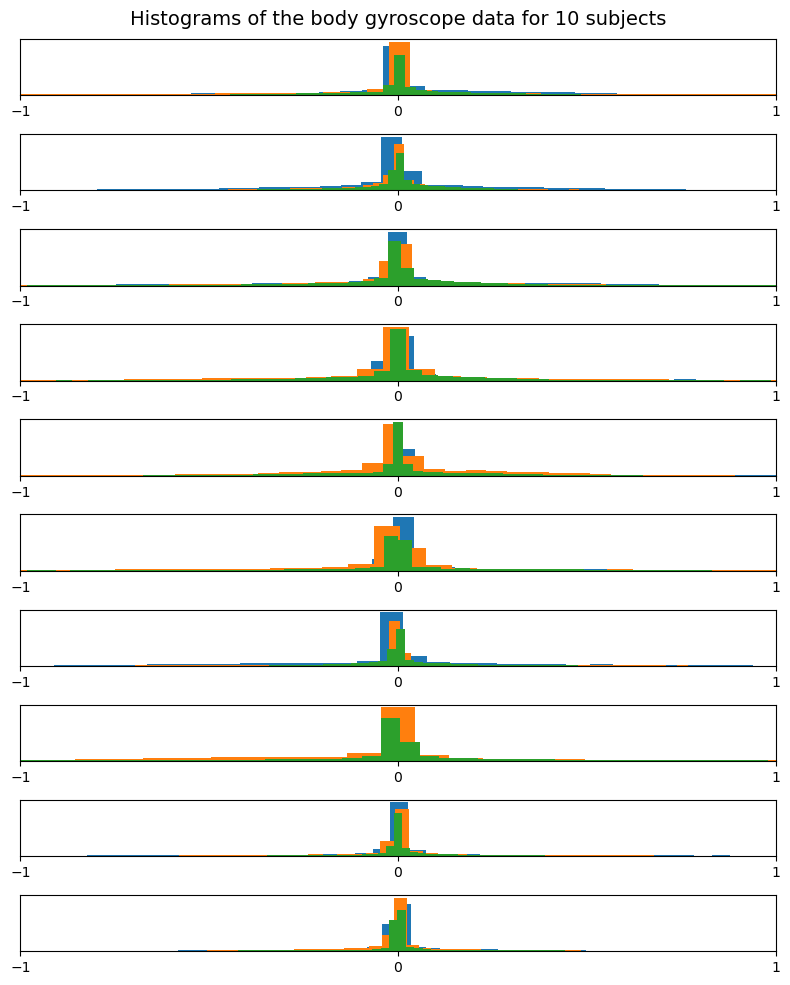

In [24]:
# plot total acceleration histograms for subjects
plot_subject_histograms(X_train, y_train, sub_map, 6, " Histograms of the body gyroscope data for 10 subjects")

### Plotting Distribution per Activity
- __Objective:__ Discriminate activities based on movement data.
- __Approach:__ Review distribution of movement data per activity for a single subject.
- __Expectation:__ Anticipate distinct distributions among activities for the same subject.
- __Method:__ Create histograms for each activity, displaying x, y, and z axes of the data type on each plot.
- In the following code we are going to plot three figures with six subplots each for activities of the first subject.

In [25]:
# Group data by activity
def data_by_activity(X, y, activities):
    return {a: X[y[:, 0] == a, :, :] for a in activities}

# Plot histograms for each activity for a subject
def plot_activity_histograms(X, y, offset):
    # Get a list of unique activities for the subject
    activity_ids = np.unique(y[:, 0])
    
    # Group windows by activity
    grouped = data_by_activity(X, y, activity_ids)
    
    # Plot per activity, histograms for each axis
    plt.figure(figsize=(8, 10))  # Adjust figure size as needed
    
    for k, act_id in enumerate(activity_ids):
        # Create subplot for each activity
        for i in range(3):
            ax = plt.subplot(len(activity_ids), 1, k + 1)
            ax.set_xlim(-1, 1)  # Set x-axis limit from -1 to 1
            
            # Plot histogram for the current axis and activity
            plt.hist(to_series(grouped[act_id][:, :, offset + i]), bins=100)
            
            # Set title for the subplot
            plt.title('Activity ' + str(act_id), y=0, loc='left', size=10)
            
            # Remove y-axis ticks for clarity
            plt.yticks([])
            
            # Set x-axis ticks at -1, 0, and 1
            plt.xticks([-1, 0, 1])
    
    plt.tight_layout()  # Adjust subplot layout
    plt.show()

__1. Total Acceleration:__
- Histograms for x, y, and z axes (total acceleration) are colored blue, orange, and green.
- Each activity has a different data distribution, with a marked difference between the large movement (first three activities) with the stationary activities (last three activities). 
- Data distributions for the first three activities look Gaussian with perhaps differing
means and standard deviations.
Distributions for the latter activities look multi-modal (i.e. multiple peaks). 

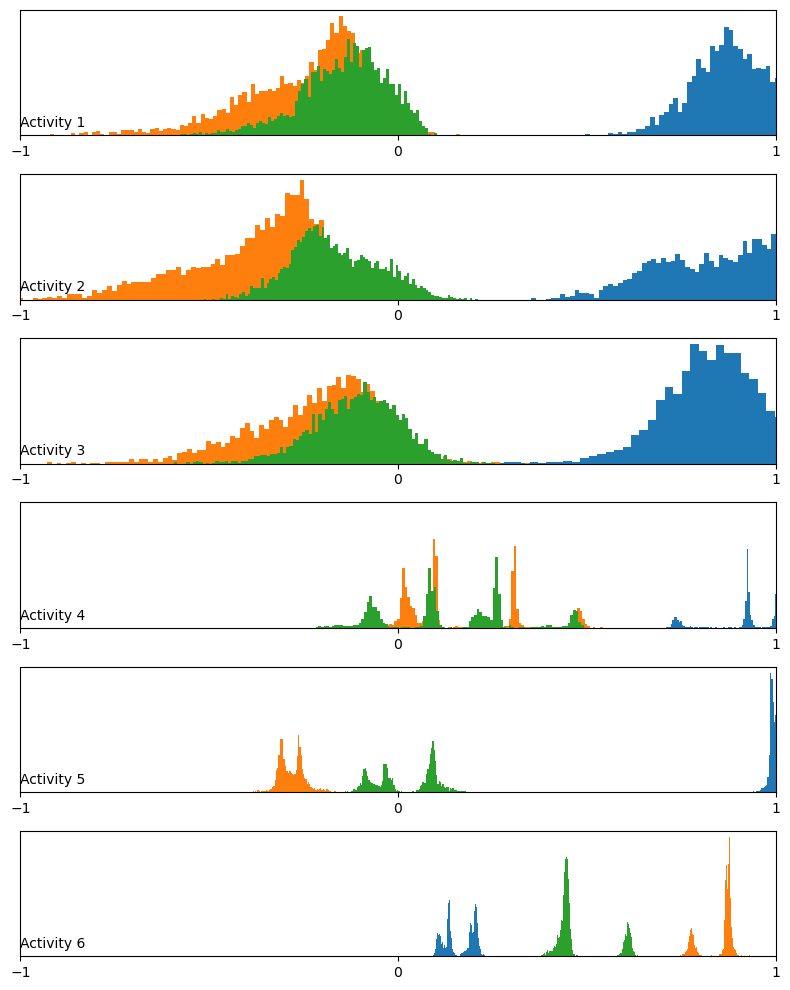

In [26]:
# plot total acceleration histograms per activity for a subject
plot_activity_histograms(sub_X, sub_y, 0)

__2. Body Acceleration:__
- Similar distribution analysis across activities.
- In-motion activities exhibit bimodal distributions, suggesting two distinct movement patterns.
- Stationary activities show Gaussian or exponential distributions, indicating different movement characteristics.
- Perhaps the total acceleration data is the key to discriminating the activities.

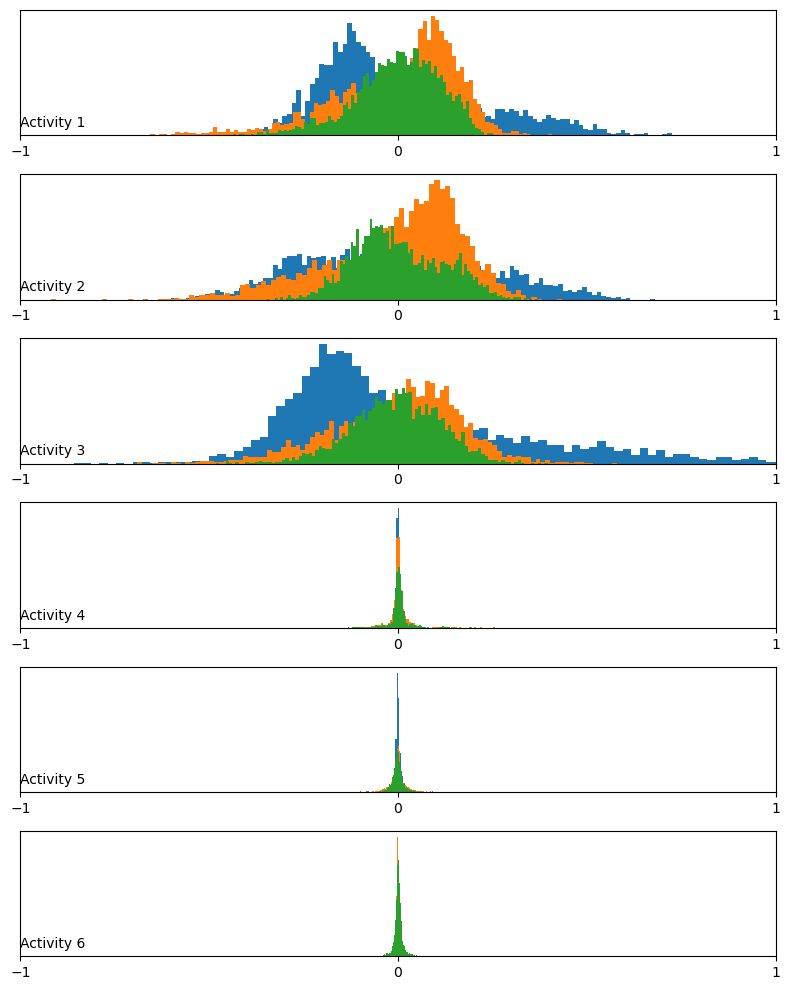

In [27]:
# plot body acceleration histograms per activity for a subject
plot_activity_histograms(sub_X, sub_y, 3)

__3. Gyroscopic:__
- Gyroscopic data patterns resemble body acceleration, but with fat-tailed Gaussian-like distributions for in-motion activities instead of bimodal distributions for the in-motion activities.
- Patterns suggest distinct movement characteristics between in-motion and stationary activities.

__All of these plots were created for the first subject, and we would expect to see similar
distributions and relationships for the movement data across activities for other subjects.__

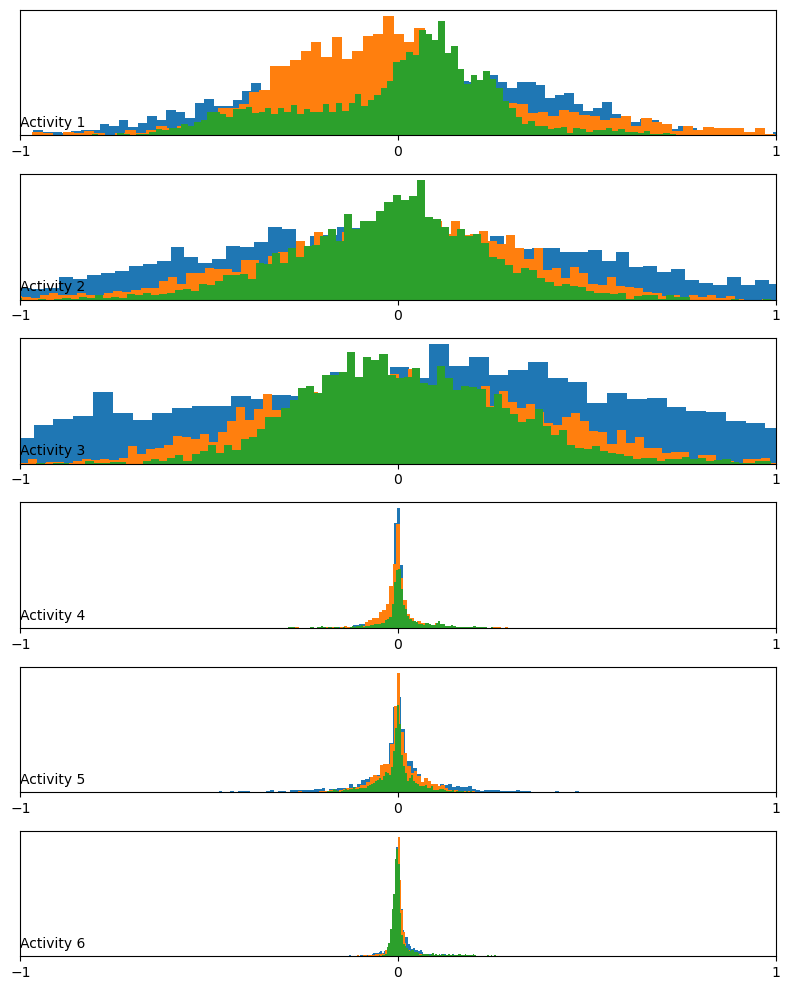

In [28]:
# plot gyroscopic histograms per activity for a subject
plot_activity_histograms(sub_X, sub_y, 6)

### Plotting Activity Duration Distribution
- __Objective:__ Analyze how long subjects spend on each activity.
- __Relation to Class Balance:__ Balanced classes in the dataset imply balanced activity durations for subjects.
- __Method:__ Calculate how long (in rows or the number of windows) subjects in the training dataset spent on each 
activity.
- __Results:__
   - Six box plots depict activity durations for each activity.
   - Subjects spend more time on stationary activities (4, 5, 6) and less on in-motion activities (1, 2, 3).
   - Activity 3 shows the shortest duration, indicating least time spent.
   - Distribution spread across activities is minimal, suggesting little need for trimming longer durations or oversampling in-motion activities.
   - Options like __trimming__ or __oversampling__ remain viable to improve predictive model performance on in-motion activities if needed.

In [29]:
# Plot activity durations by subject
def plot_activity_durations_by_subject(X, y, sub_map):
    # Get unique subjects and activities
    subject_ids = np.unique(sub_map[:, 0])
    activity_ids = np.unique(y[:, 0])
    
    # Dictionary to store activity windows counts
    activity_windows = {a: [] for a in activity_ids}
    
    # Enumerate subjects
    for sub_id in subject_ids:
        # Get data for one subject
        _, subj_y = data_for_subject(X, y, sub_map, sub_id)
        
        # Count windows by activity for the current subject
        for a in activity_ids:
            activity_windows[a].append(len(subj_y[subj_y[:, 0] == a]))
    
    # Organize durations into a list of lists
    durations = [activity_windows[a] for a in activity_ids]
    
    # Plot boxplots of activity durations
    plt.figure()
    plt.boxplot(durations, labels=activity_ids)
    plt.xlabel('Activity ID')
    plt.ylabel('Duration (number of windows)')
    plt.title('Activity Durations by Subject')
    plt.show()

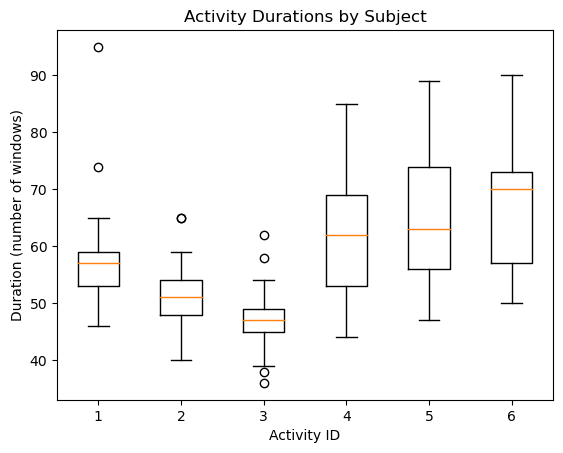

In [30]:
# Plot durations
plot_activity_durations_by_subject(X_train, y_train, sub_map)

### 1. Trimming:
- __Definition:__ Trimming involves reducing the number of samples or data points from the over-represented classes (activities) to balance them with the under-represented classes.
- __Purpose:__ This is typically done to prevent the model from being biased towards the over-represented classes during training, which could lead to poorer performance on predicting less represented classes.

### 2. Oversampling:
- __Definition:__ Oversampling refers to increasing the number of samples or data points from the under-represented classes to balance the dataset.
- __Purpose:__ By artificially increasing the number of samples in the under-represented classes, oversampling aims to ensure that the model has enough data to learn effectively from all classes, thus improving its ability to correctly predict activities from those classes.

## Approach to Modeling
### 1. Problem Framing:
- The first important consideration is the framing of the prediction problem. 
- __Predicting Activity from Movement Data:__ 
   - Predict the activity based on a window of movement data.
- Alternative Problem Framings:
   - Predict activity using each time step of movement data.
   - Predict activity using multiple windows of movement data.
   - Predict the sequence of activities using multiple windows of movement data.
   - Predict activity cessation or transition using each time step of movement data.
   - Predict stationary or non-stationary activities using a window of movement data.
- These framings __vary in complexity__, offering different insights into the dataset.

### 2. Data Preparation
- <u>Initial Data State</u>:
   - Data is scaled to [-1, 1].
- __<u>Potential Data Transformations:__
   - Normalize data across subjects.
   - Standardize data within each subject.
   - Standardize data across all subjects.
   - Detect and remove signal outliers.
   - Remove over-represented activity windows.
   - Oversample under-represented activity windows.
   - Downsample signal data to (0.25, 0.5, 1, 2) or other fractions or segments.
- These preparations __optimize data suitability for modeling__, considering different aspects of data structure and distribution.

<u>__Note__</u>:
- __Normalize across subjects:__ Adjust data so all subjects' data fall within the same scale.
- __Standardize within each subject:__ Adjust data so each subject's measurements have a mean of zero and standard deviation of one.
- __Standardize across all subjects:__ Adjust the entire dataset so all subjects' measurements have a mean of zero and standard deviation of one, ensuring uniformity across the dataset.

### 3. Predictive Modeling
- __Problem Definition:__
   - Main Problem: Time series multiclass classification.
   - Alternative Framings: Binary classification and multi-step time series classification.
- __Baseline model:__
   - Approach: Original paper used a modified Support Vector Machine (SVM) on feature-engineered data.
   - Purpose: Provides a baseline performance on the dataset.
- __Focus on Raw Data:__
   - Approach: Shift towards un-engineered or raw dataset.
   - Objective: Explore model complexity to find the most suitable approach.
   - Candidate Models: Include common machine learning algorithms, Multilayer Perceptron (MLP), 1D Convolutional Neural Networks (CNNs), LSTMs, and hybrids like CNN-LSTM and ConvLSTM.

### 4. Model Evaluation
- __Evaluation Methods:__
1. <u>Original Approach:</u> Train/test split by subject (70% train, 30% test).
2. <u>Alternative:</u> Consider leave-one-out cross-validation (LOOCV) per subject.
   - __Advantage:__ Each subject's data is kept intact either in the training or test set. This ensures that the model does not see data from the same subject in both training and testing, which helps in assessing how well the model performs on subjects it hasn't seen before.
- __Performance Metrics:__
   - <u>Metrics Used:</u> Classification accuracy and confusion matrix.
   - <u>Purpose:</u> Understand overall model performance and class-specific prediction challenges.
   - <u>Insight from Confusion Matrix:</u> Helps identify classes that are easier or harder to predict (e.g., stationary vs. motion activities).

1. __Original Approach: Train/Test Split by Subject (70% Train, 30% Test):__
   - Explanation: In this method, the dataset is divided into two parts:
   - Training Set (70%): Used to train the machine learning model.
   - Test Set (30%): Used to evaluate how well the trained model generalizes to new, unseen data.
   - Application: Each subject's data is kept intact either in the training or test set. This ensures that the model does not see data from the same subject in both training and testing, which helps in assessing how well the model performs on subjects it hasn't seen before.
2. __Alternative: Leave-One-Out Cross-Validation (LOOCV) per Subject:__
   - Explanation: In LOOCV, each subject's data is iteratively treated as the test set, while the remaining subjects' data form the training set. This process is repeated for each subject, resulting in multiple rounds of training and testing.
   - Application: By leaving out one subject at a time for testing, the model is trained on a larger portion of the data, which can lead to a more robust evaluation of its performance. LOOCV provides a score for each subject, and these scores can be averaged to get an overall performance measure.

### In the following sections, we are going to answer the following questions:
1. How to load and evaluate nonlinear and ensemble machine learning algorithms on the
feature-engineered version of the activity recognition dataset?
2. How to load and evaluate machine learning algorithms on the raw signal data for the
activity recognition dataset?
3. How to define reasonable lower and upper bounds on the expected performance of more
sophisticated algorithms capable of feature learning, such as deep learning methods?

## 1. Modeling Feature Engineered Data


### 1. Load Dataset

In [31]:
# Load a dataset group (train or test)
def load_dataset_group(group, prefix=''):
    # Load input data (features)
    X = load_file(prefix + group + '/X_' + group + '.txt')
    # Load class output (labels)
    y = load_file(prefix + group + '/y_' + group + '.txt')
    return X, y

# Load the entire dataset, returns both train and test X and y elements
def load_dataset(prefix=''):
    # Load training data
    X_train, y_train = load_dataset_group('train', prefix + 'HARDataset/')
    # Load testing data
    X_test, y_test = load_dataset_group('test', prefix + 'HARDataset/')
    
    # Flatten y to make it one-dimensional
    y_train, y_test = y_train[:, 0], y_test[:, 0]
    
    return X_train, y_train, X_test, y_test

### 2. Define Models
- We will evaluate a set of machine learning models using their default configurations to gauge their performance on this problem. 
- Our aim is to get a general understanding of how well these sophisticated models perform without optimizing their settings. The models we will assess include:
- __1. Nonlinear Algorithms:__
   - k-Nearest Neighbors.
   - Classification and Regression Tree.
   - Support Vector Machine.
   - Naive Bayes.
- __2. Ensemble Algorithms:__
   - Random Forest
   - Extra Trees
   - Gradient Boosting Machine

In [32]:
# Define a dictionary of standard models to evaluate {name:object}
def define_models(models=dict()):
    # Nonlinear models
    models['knn'] = KNeighborsClassifier(n_neighbors=7)  # k-Nearest Neighbors with 7 neighbors
    models['cart'] = DecisionTreeClassifier()  # Classification and Regression Tree
    models['svm'] = SVC()  # Support Vector Machine
    models['bayes'] = GaussianNB()  # Naive Bayes
    
    # Ensemble models
    models['rf'] = RandomForestClassifier(n_estimators=100)  # Random Forest with 100 estimators
    models['et'] = ExtraTreesClassifier(n_estimators=100)  # Extra Trees with 100 estimators
    models['gbm'] = GradientBoostingClassifier(n_estimators=100)  # Gradient Boosting Machine with 100 estimators
    
    print('Defined %d models' % len(models))  # Print the number of models defined
    return models  # Return the dictionary of models

### 3. Evaluate Models

we assess the performance of our defined models using the dataset. This involves two steps: evaluating a __single model__ and evaluating __all models__ collectively.
- __Single Model Evaluation:__
   - Training: We train the model using the training dataset.
   - Prediction: The model predicts outcomes for the test dataset.
   - Evaluation: We measure its performance using classification accuracy, which shows how well the model identifies the correct activity among the six possible activities.

In [33]:
# Evaluate a single model and return accuracy, precision, and recall
def evaluate_model(X_train, y_train, X_test, y_test, model):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    yhat = model.predict(X_test)
    
    # Evaluate predictions
    accuracy = accuracy_score(y_test, yhat)
    # precision = precision_score(y_test, yhat, average='weighted')
    # recall = recall_score(y_test, yhat, average='weighted')
    
    # # Print precision and recall
    # print(f'Precision: {precision:.2f}')
    # print(f'Recall: {recall:.2f}')
    
    # Return accuracy as a percentage
    return accuracy * 100.0

In [34]:
# Evaluate a dictionary of models {name:object}, returns {name:score}
def evaluate_models(X_train, y_train, X_test, y_test, models):
    results = {}
    for name, model in models.items():
        # Evaluate the model
        results[name] = evaluate_model(X_train, y_train, X_test, y_test, model)
        # Show progress
        print(f'>{name}: {results[name]:.3f}')
    return results

In [35]:
# Print the results
def summarize_results(results, maximize=True):
    # Create a list of (name, mean(scores)) tuples
    mean_scores = [(k, v) for k, v in results.items()]
    
    # Sort tuples by mean score
    mean_scores = sorted(mean_scores, key=lambda x: x[1])
    
    # Reverse for descending order (e.g., for accuracy)
    if maximize:
        mean_scores = list(reversed(mean_scores))
    
    print()
    for name, score in mean_scores:
        print('Name=%s, Score=%.3f' % (name, score))

In [36]:
X_train, y_train, X_test, y_test = load_dataset()

In [37]:
X_train.shape

(7352, 561)

In [38]:
y_test.shape

(2947,)

In [39]:
# Load dataset
X_train, y_train, X_test, y_test = load_dataset()
# Get model list
models = define_models()
# Evaluate models
results = evaluate_models(X_train, y_train, X_test, y_test, models)
# Summarize results
summarize_results(results)

Defined 7 models
>knn: 90.329
>cart: 86.257
>svm: 95.046
>bayes: 77.027
>rf: 92.603
>et: 94.164


KeyboardInterrupt: 

## 2. Modeling Raw Data
- Framework: Use the same framework for evaluating machine learning models on raw data.
- Raw Data: Requires additional work to load.
- Signal Types: Three main types in the raw data: Total acceleration, Body acceleration, and Body gyroscope.
Axes: Each signal has three axes, resulting in nine variables per time step.
- Data Partitioning: Data is divided into overlapping windows of 2.65 seconds (128 time steps).
- Data Dimensions: One row of data = 128 time steps × 9 variables = 1,152 elements.
- Data Storage:
   - Signals are stored in the '/Inertial Signals/' directory within train and test subdirectories.
   - Each axis of each signal is stored in a separate file.
   - Each dataset (train/test) has nine input files and one output file.
- Loading Data:
   - Batch load files using consistent directory structures and file naming conventions.
   - Load all data for a group into a single three-dimensional NumPy array with dimensions: [samples, timesteps, features].

In [40]:
# Load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    """
    Load all data for a given dataset group (train or test).
    
    Parameters:
    group (str): The dataset group to load ('train' or 'test').
    prefix (str): Prefix path to the dataset.
    
    Returns:
    tuple: Input data (X) and output class data (y).
    """
    filepath = prefix + group + '/Inertial Signals/'
    # List all 9 data files to load
    filenames = [
        # Total acceleration
        'total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt',
        # Body acceleration
        'body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt',
        # Body gyroscope
        'body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt'
    ]
    # Load input data
    X = load_group(filenames, filepath)
    # Load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y

In [41]:
# Load the entire dataset, returns both train and test X and y elements
def load_dataset(prefix=''):
    # Load training data
    X_train, y_train = load_dataset_group('train', prefix + 'HARDataset/')
    # Load testing data
    X_test, y_test = load_dataset_group('test', prefix + 'HARDataset/')

    # Flatten X data to 2D array (samples, features)
    X_train = X_train.reshape((X_train.shape[0], -1))
    X_test = X_test.reshape((X_test.shape[0], -1))
    
    # Flatten y labels to 1D array
    y_train = y_train.flatten()
    y_test = y_test.flatten()
    
    return X_train, y_train, X_test, y_test

In [42]:
# Load dataset
X_train, y_train, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7352, 1152) (7352,)
(2947, 1152) (2947,)


In [ ]:
# Get model list
models = define_models()
# Evaluate models
results = evaluate_models(X_train, y_train, X_test, y_test, models)
# Summarize results
summarize_results(results)

Defined 7 models
>knn: 61.893
>cart: 72.107
>svm: 88.734
>bayes: 72.480
>rf: 85.070
>et: 86.664


- Best Performance:
   - Ensembles of decision trees perform the best on raw data.
   - Gradient Boosting and Extra Trees achieve around 87% and 86% accuracy.
   - These are about seven points lower than the best models on the feature-engineered dataset.
- SVM Performance: Support Vector Machine (SVM) accuracy drops to around 88.7%.
Feature Selection:
   - Good performance of decision tree ensembles suggests the importance of feature selection.
   - Ensemble methods are effective at selecting relevant features for predicting activities.
     
Note: Results may vary due to the stochastic nature of the algorithms.